# Sheet 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

## 2 Projection Trick

(a)

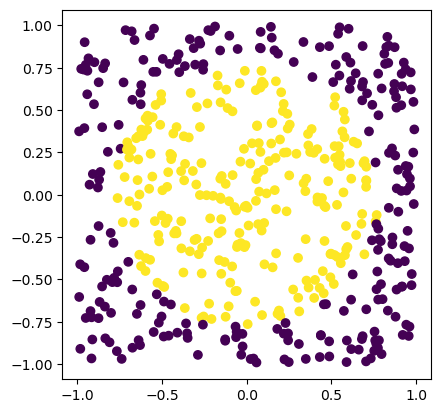

In [2]:
# Load the data
xy = np.load('data03/data2d.npy')
labels = np.load('data03/labels.npy')

# TODO: Plot the data
plt.scatter(*xy.T, c = labels)
plt.gca().set_aspect('equal')

accuracy = 55.80%


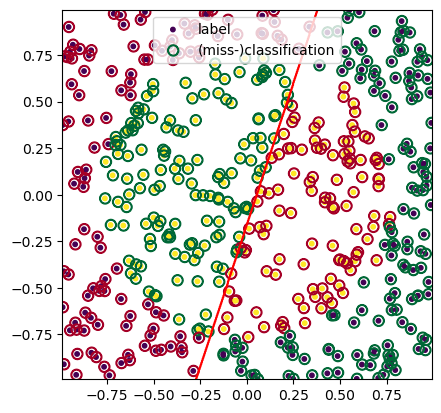

In [3]:
from sklearn.linear_model import LogisticRegression

# fit logistic regression
model = LogisticRegression()
model.fit(xy, labels)

# compute the accuracy
accuracy = (model.predict(xy) == labels).mean()
print(f'{accuracy = :.2%}')

# visualize the decision boundary
X = np.linspace(np.min(xy), np.max(xy), 500)
grid = np.array([[x, y] for x in X for y in X])

plt.gca().set_aspect('equal')
plt.scatter(*xy.T, s = 10, c = labels, label = 'label')
plt.scatter(*xy.T, s = 70, c = (model.predict(xy) == labels), marker = '$◯$', cmap = 'RdYlGn', label = '(miss-)classification')
plt.contour(X, X, model.predict(grid).reshape(len(X), len(X)).T, levels = (0.5, ), colors = ('red', ))
_ = plt.legend()

This problem cannot be solved using a linear decision boundry. The model accuracy is limited to around ~55% which is barely better then simply guessing.

(b) <br>
Using the non-linear transformation $$z = x^2 + y^2$$ we can project the features into a space that can be solved using a linear decision boundry.

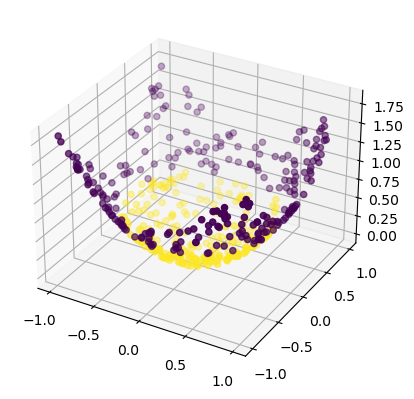

In [4]:
# Come up with a nonlinear tranformation for the third feature. Compute it and concatenate to the data.
z = np.sum(xy**2, axis = 1)
xyz = np.concatenate([xy, z[:, None]], axis = 1)

# Show the enhanced data, e.g. with a 3D scatter plot 
ax = plt.figure().add_subplot(projection='3d')
ax.scatter3D(*xyz.T, c = labels)

In [5]:
# again, fit and evaluate logistic regression
model = LogisticRegression()
model.fit(xyz, labels)

accuracy = (model.predict(xyz) == labels).mean()

print(f'{accuracy = :.2%}')

accuracy = 99.00%


Using the non linear projection we can achieve very high model accuracies.

c) <br>
A MLP with a single layer can be written as $$x^{(1)} = \phi(W * x^{(0)} + b)$$ where $$\phi$$ is any non-linear differentiable function. Defining $$W = 1; b = 0$$ and $$\phi(x) = x * x$$ we arrive at the exact same transformation that was used in 2b)

## 3) Linear regions of MLPs

(a)

In [6]:
# TODO: define NN architecture
torch.no_grad()

class single_layer_perceptron(torch.nn.Module):
    def __init__(self,):
        super(single_layer_perceptron, self).__init__()

        self.linear_in = torch.nn.Linear(2, 20)
        self.activation = torch.nn.ReLU()
        self.linear_out = torch.nn.Linear(20, 1)

    def forward(self, x):
        x = torch.tensor(x).float()
        x = self.linear_in(x)
        x = self.activation(x)
        x = self.linear_out(x)

        return x

In [7]:
model = single_layer_perceptron()

nr_parameters = sum([np.prod(t.size()) for t in model.parameters()])
print(f'{nr_parameters = }')

nr_parameters = 81


b)

In [8]:
# TODO: instantiate the model and make the visualizations as requested in the task
def plot_output(model, range = (-10, 10)):
    marginal_coords = np.linspace(*range, 500)
    X, Y = np.meshgrid(marginal_coords, marginal_coords)
    grid = np.vstack([X.ravel(), Y.ravel()]).T

    Z = model(grid)
    
    plt.figure(figsize=(3,3))
    plt.gca().set_aspect('equal')
    plt.imshow(Z.reshape(500,500).detach(), cmap='viridis')

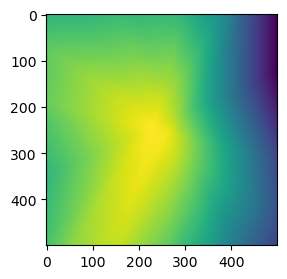

In [9]:
model = single_layer_perceptron()
plot_output(model, (-10, 10))

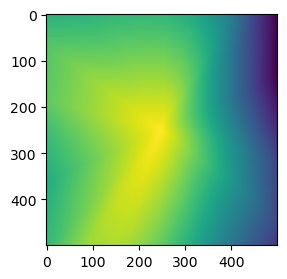

In [10]:
plot_output(model, (-100,100))

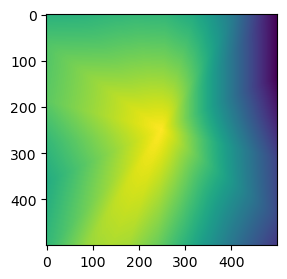

In [11]:
plot_output(model, (-1000, 1000))

(c)

In [12]:
# TODO: instantiate the model and make the visualizations as requested in the task
def plot_gradient(model, range = (-10, 10)):
    marginal_coords = np.linspace(*range, 500)
    X, Y = np.meshgrid(marginal_coords, marginal_coords)
    grid = np.vstack([X.ravel(), Y.ravel()]).T

    Z = model(grid)
    gradient = np.gradient(Z.reshape(500,500).detach())

    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(gradient[0], cmap='viridis')
    ax2.imshow(gradient[1], cmap='viridis')

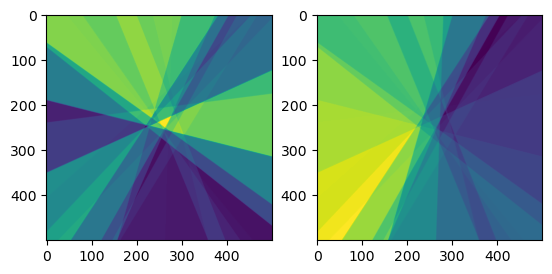

In [13]:
plot_gradient(model)

(d)

In [14]:
# TODO: define NN architecture
class multi_layer_perceptron(torch.nn.Module):
    def __init__(self,):
        super(multi_layer_perceptron, self).__init__()
        
        self.activation = torch.nn.ReLU()
        self.linear_in = torch.nn.Linear(2, 5)
        self.hidden = [torch.nn.Linear(5, 5) for i in range(4)]
        self.linear_out = torch.nn.Linear(5, 1)

    def forward(self, x):
        x = torch.tensor(x).float()
        x = self.linear_in(x)
        for i in range(4):
            x = self.hidden[i](x)
        x = self.activation(x)
        x = self.linear_out(x)

        return x

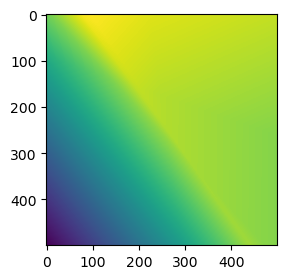

In [15]:
# TODO: instantiate the model and make the visualizations as requested in the task
model = multi_layer_perceptron()
plot_output(model, (-100, 100))

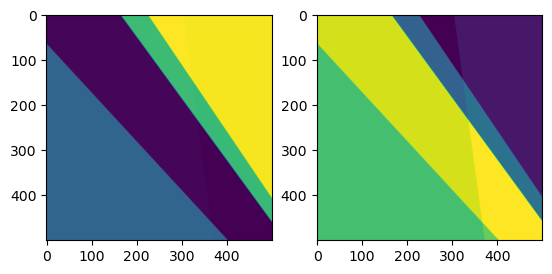

In [16]:
plot_gradient(model)